In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=4)
tf.__version__

'2.7.0'

In [50]:
samples = 100
x_train = tf.linspace(0, 100, samples)
y = tf.linspace(0, 100, samples) 
y_train = y + tf.random.normal([samples], 3, 10, tf.double)

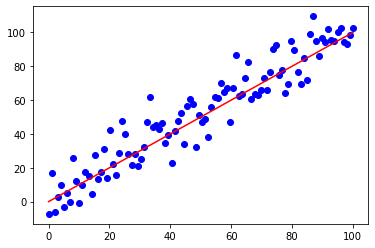

In [51]:
plt.scatter(x_train, y_train, c='blue')
plt.plot(x_train, y, c='red')

In [52]:
learning_rate = 0.1
epoches = 550

normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(x_train)

model = Sequential([normalizer, layers.Dense(units=1)])
model.summary(), normalizer.mean.numpy()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


2021-12-24 00:28:12.762135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-24 00:28:12.780681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(None, array([50.], dtype=float32))

In [53]:
model.predict(x_train[:10])

2021-12-24 00:28:12.896094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-1.3298],
       [-1.303 ],
       [-1.2761],
       [-1.2492],
       [-1.2224],
       [-1.1955],
       [-1.1686],
       [-1.1418],
       [-1.1149],
       [-1.088 ]], dtype=float32)

In [54]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
    loss='mean_absolute_error')

In [55]:
%%time
history = model.fit(
    x_train,
    y_train,
    epochs=epoches,
    verbose=0,
    validation_split = 0.3)

2021-12-24 00:28:13.105110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-24 00:28:13.239019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


CPU times: user 14.5 s, sys: 7.31 s, total: 21.8 s
Wall time: 16.3 s


In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
545,7.938016,7.153019,545
546,7.937706,7.150064,546
547,7.934333,7.144361,547
548,7.933035,7.131818,548
549,7.933918,7.124199,549


In [57]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

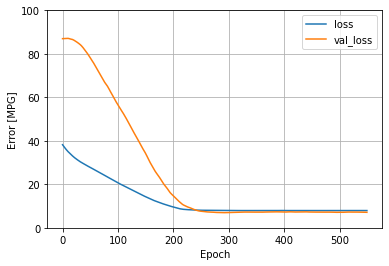

In [58]:
plot_loss(history)

In [59]:
x_test = tf.linspace(0, 100, samples)
y_test = model.predict(x_test)

2021-12-24 00:28:29.478555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


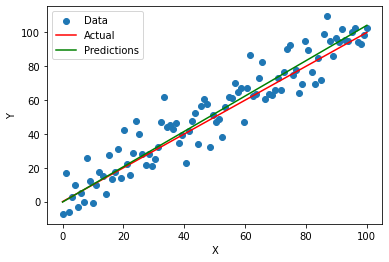

In [60]:
plt.scatter(x_train, y_train, label='Data')
plt.plot(x_train, y, color='r', label='Actual')
plt.plot(x_test, y_test, color='g', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()